In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk(r'C:\SingRecognizer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\SingRecognizer\american_sign_language.PNG
C:\SingRecognizer\amer_sign2.png
C:\SingRecognizer\amer_sign3.png
C:\SingRecognizer\sign_mnist_test.csv
C:\SingRecognizer\sign_mnist_train.csv
C:\SingRecognizer\sign_mnist_test\sign_mnist_test.csv
C:\SingRecognizer\sign_mnist_train\sign_mnist_train.csv


In [2]:
train=pd.read_csv(r'C:\SingRecognizer\sign_mnist_train.csv')
test=pd.read_csv(r'C:\SingRecognizer\sign_mnist_test.csv')
print('train shape',str(train.shape),"\n test shape",test.shape)

train shape (27455, 785) 
 test shape (7172, 785)


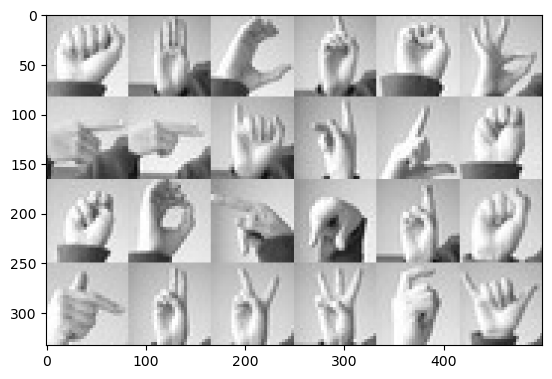

In [3]:
import matplotlib.pyplot as plt
img=plt.imread(r'C:\SingRecognizer\amer_sign3.png')
plt.imshow(img)

In [4]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [5]:
train.label.value_counts()

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64

In [6]:
# X_train: Training images (numpy array with shape: [num_samples, 28, 28])
X_train=train.iloc[:,1:].values
# y_train: Corresponding labels (numpy array with shape: [num_samples])
y_train=train.label.values

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

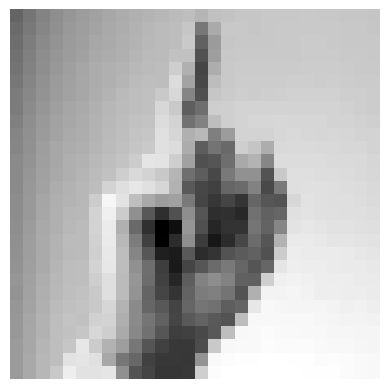

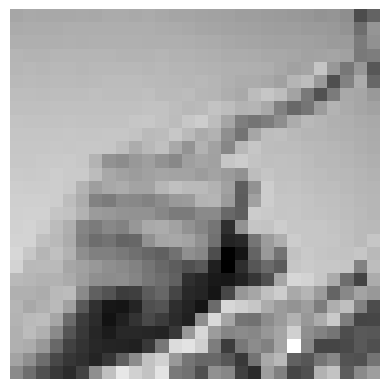

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Replace this with your actual dataset of flattened pixel arrays

flattened_images = X_train

# Reshape the flattened images to their original shape (28x28)
reshaped_images = flattened_images.reshape(-1, 28, 28)

# Display the reconstructed images
for i in range(2):
    #plt.subplot(1, len(reshaped_images), i + 1)
    plt.imshow(reshaped_images[i], cmap='gray')
    plt.axis('off')
    plt.show()

plt.show()

In [9]:
reshaped_images[0]

array([[107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
        165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
        170, 169],
       [111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160, 163, 164,
        170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172, 172, 171,
        171, 170],
       [113, 123, 131, 137, 142, 145, 150, 152, 155, 158, 161, 163, 164,
        172, 105, 142, 170, 171, 171, 171, 172, 172, 173, 173, 172, 171,
        171, 171],
       [116, 125, 133, 139, 143, 146, 151, 153, 156, 159, 162, 163, 167,
        167,  95, 144, 171, 172, 172, 172, 172, 172, 173, 173, 173, 172,
        172, 171],
       [117, 126, 134, 140, 145, 149, 153, 156, 158, 161, 163, 164, 175,
        156,  87, 154, 172, 173, 173, 173, 173, 173, 174, 174, 174, 173,
        172, 172],
       [119, 128, 136, 142, 146, 150, 153, 156, 159, 163, 165, 164, 184,
        148,  89, 164, 172, 174, 174, 174, 174, 175, 175, 174, 175, 174,
        173, 173],
       [12

In [10]:
X_train = reshaped_images / 255.0

# Convert labels to one-hot encoded vectors

In [11]:
num_classes = 26
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

# Build The Cnn Model

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.05),
    Dense(num_classes, activation='softmax')
])

# Compile The Model

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Define the EarlyStopping callback

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the model

In [15]:
history = model.fit(X_train, y_train, batch_size=32, epochs=7, validation_split=0.2)

Epoch 1/7
687/687 [==============================] - 21s 25ms/step - loss: 1.0919 - accuracy: 0.6705 - val_loss: 0.1755 - val_accuracy: 0.9561
Epoch 2/7
687/687 [==============================] - 17s 25ms/step - loss: 0.1145 - accuracy: 0.9687 - val_loss: 0.0294 - val_accuracy: 0.9964
Epoch 3/7
687/687 [==============================] - 17s 25ms/step - loss: 0.0343 - accuracy: 0.9921 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 4/7
687/687 [==============================] - 17s 25ms/step - loss: 0.0176 - accuracy: 0.9961 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/7
687/687 [==============================] - 17s 24ms/step - loss: 0.0183 - accuracy: 0.9949 - val_loss: 0.0021 - val_accuracy: 0.9998
Epoch 6/7
687/687 [==============================] - 17s 24ms/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0034 - val_accuracy: 0.9998
Epoch 7/7
687/687 [==============================] - 17s 25ms/step - loss: 0.0120 - accuracy: 0.9964 - val_loss: 0.0017 - val_accuracy: 1.0000

# Plot training and validation accuracy and loss

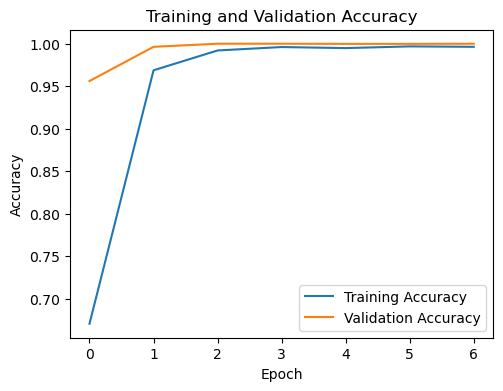

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

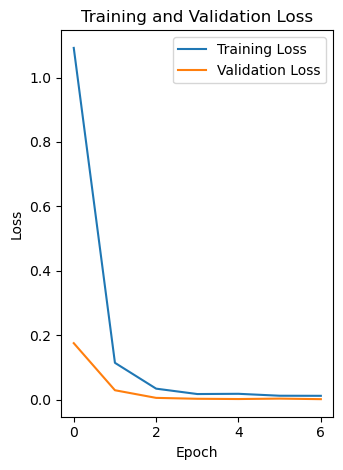

In [17]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
!pip install mediapipe

# Webcam

In [19]:
import cv2
import numpy as np
import mediapipe as mp
from keras.models import load_model

# Load your trained model
model = load_model('sign_language_model_CNN.h5')

# Define labels corresponding to letters A-Z
labels = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize Mediapipe hand detection
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect hands using Mediapipe
    results = hands.process(rgb_frame)
    
    if results.multi_hand_landmarks:
        # Get the bounding box of the hand
        for landmarks in results.multi_hand_landmarks:
            x_min, x_max, y_min, y_max = 1000, 0, 1000, 0
            for landmark in landmarks.landmark:
                x, y = int(landmark.x * frame.shape[1]), int(landmark.y * frame.shape[0])
                if x < x_min:
                    x_min = x
                if x > x_max:
                    x_max = x
                if y < y_min:
                    y_min = y
                if y > y_max:
                    y_max = y

            # Extract hand region
            hand_frame = frame[y_min:y_max, x_min:x_max]
            
            if hand_frame.shape[0] > 0 and hand_frame.shape[1] > 0:
                # Preprocess the hand frame
                resized_hand_frame = cv2.resize(hand_frame, (28, 28))
                grayscale_hand_frame = cv2.cvtColor(resized_hand_frame, cv2.COLOR_BGR2GRAY)
                normalized_hand_frame = grayscale_hand_frame / 255.0

                # Make a prediction
                input_frame = normalized_hand_frame.reshape(1, 28, 28, 1)  # Reshape for a single image
                
                prediction = model.predict(input_frame)
                predicted_label = np.argmax(prediction)

                # Get the corresponding letter
                letter = labels[predicted_label]

                # Display the prediction on the hand frame
                cv2.putText(hand_frame, letter, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                # Display both frames in separate windows
                cv2.imshow('Original Frame', frame)
                cv2.imshow('Hand Frame', hand_frame)

    # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 32ms/step
